# Môn: Lập trình cho Khoa học dữ liệu

**Đồ án cuối kỳ**
______________

**Nhóm 17 - Thông tin thành viên:**

| Nhóm | Họ và Tên | MSSV | Gitthub
|:-:|:-|:-:|:-:
| 17 | Trần Hữu Chí Bảo | 18120288 | https://github.com/baocl18ctt2
| 17 | Trần Xuân Quý | 18120231 |  https://github.com/XQuyTran


In [87]:
!wget -qO- https://drive.google.com/uc?id=1qLX0ikPjBdSutO_vsNdthC6DGVmyL-e6 > who_life_exp.csv

# Môi trường code

In [88]:
!which python

/usr/local/bin/python


# Import thư viện

In [89]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Thu thập dữ liệu

- Tập dữ liệu được sử dụng trong đồ án của nhóm có chủ đề về các yếu tố liên quan và/hoặc có thể gây ảnh hưởng đếntuổi thọ trung bình của người dân ở các quốc gia trên thế giới. Tập dữ liệu này được thu thập và đăng tải trên Kaggle bởi người dùng MMattson với giấy phép Creative Common Public Domain - CC0 cho phép sử dụng tập dữ liệu tùy ý mà không cần xin phép.

- Theo mô tả, tập dữ liệu trên được thu thập từ 2 nguồn là GHO - Global Health Observatory và UNESCO, với các số liệu trong khoảng thời gian từ năm 2000 - 2016. Về phần dữ liệu từ UNESCO tác giả đã truy cập vào trang web về dữ liệu Thống kê về Giáo dục các Quốc gia của Viện thống kê UNESCO và thu thập dữ liệu thủ công. 
- Dữ liệu từ GHO được thu thập sử dụng thư viện request thông qua GHO OData API portal.
- Kaggle: https://www.kaggle.com/mmattson/who-national-life-expectancy
____

In [90]:
data_df = pd.read_csv('who_life_exp.csv')

In [91]:
data_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


# Khám Phá dữ liệu

## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [92]:
num_rows, num_cols = data_df.shape

In [93]:
num_rows, num_cols

(3111, 32)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin của một quốc gia trong 1 năm về các yếu tố ảnh hưởng đến tuổi thọ, và có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

## Dữ liệu có các dòng bị lặp không?

In [94]:
data_df.duplicated().sum()

0

- Vậy bộ dữ liệu này không có dòng nào bị lặp

## Mỗi cột có ý nghĩa gì?

|Thuộc tính | Mô tả |
|:------:| ---|
|Country| Tên quốc gia|
|country_code| Định danh ba chữ cái của một quốc gia|
|region| Khu vực toàn cầu của đất nước|
|year| Năm|
|life_expect| Tuổi thọ trung bình (tuổi)|
|life_exp60| Tuổi thọ trung bình 60(tuổi)|
|adult_mortality|Tỷ lệ tử vong ở người trưởng thành (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
|infant_mort|Tỷ lệ tử vong dưới 1 tuổi|
|age1-4mort|Tỷ lệ tử vong từ 1 đến 4 tuổi|
|alcohol|Rượu, mức tiêu thụ bình quân đầu người (15+) được ghi nhận|
|bmi|BMI trung bình (ước tính chuẩn hóa theo độ tuổi)|
|age5-19thinness|Tỷ lệ gầy ở trẻ em và thanh thiếu niên|
|age5-19obesity	|Tỷ lệ béo phì ở trẻ em và thanh thiếu niên|
|hepatitis|Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ 1 tuổi (%)|
|measles|Tỷ lệ tiêm chủng liều đầu tiên (MCV1) có chứa vắc xin sởi cho trẻ 1 tuổi (%)|
|polio| Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ 1 tuổi (%)|
|diphtheria|Tỷ lệ tiêm chủng giải độc tố uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%)|
|basic_water|Dân số sử dụng ít nhất các dịch vụ nước uống đạt tiêu chuẩn|
|doctors|Bác sĩ y khoa (trên 10.000)|
|hospitals|Số lượng bệnh viện trên 100.000 dân|
|gni_capita|Tổng thu nhập quốc dân trên đầu người (tổng thu thập mà người dân và doanh nghiệp của quốc gia kiếm được)|
|gghe-d	|Chi tiêu chung cho y tế của chính phủ trong nước tính theo tỷ lệ phần trăm của tổng sản phẩm quốc nội (GDP) (%)|
|che_gdp|Chi tiêu cho y tế hiện tại (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%)|
|une_pop|Dân số (hàng nghìn)|
|une_infant|Tỷ lệ tử vong, trẻ sơ sinh (trên 1.000 trẻ sống)|
|une_life|Tuổi thọ trung bình|
|une_hiv|Tỷ lệ nhiễm HIV, tổng số (\% dân số từ 15-49 tuổi)|
|une_gni|Tổng thu nhập quốc dân trên đầu người|
|une_poverty|Tỷ lệ số người nghèo ở mức 1,90 đô la một ngày (PPP) (\% dân số)|
|une_edu_spend|Chi tiêu của chính phủ cho giáo dục tính theo phần trăm GDP (\%)|
|une_literacy|Tỷ lệ người lớn biết chữ, dân số trên 15 tuổi, cả hai giới (\%)|
|une_school|Số năm đi học trung bình (ISCED 1 trở lên), dân số từ 25 tuổi trở lên, cả hai giới|

**Các thuộc tính có tên une_** được thống kê bởi tổ chức UNESCO.

**Các thuộc tính còn lại** được thống kê bởi GHO (Global Health Observatory).


## Mỗi cột hiện đang có kiểu dữ liệu gì?

In [95]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

Trong Pandas, kiểu dữ liệu object thường ám chỉ chuỗi, nhưng kiểu dữ liệu object có thể chứa một đối tượng bất kỳ trong Python. Để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh type để xem kiểu dữ liệu.



### Kiểm tra kiểu dữ liệu thực sự của đối tượng object

In [96]:
def open_object_dtype(s):
    dtypes = set(s.apply(lambda x: type(x)).unique().tolist())
    return dtypes

In [97]:
object_df = data_df.select_dtypes(include = 'object').columns
data = object_df.map(lambda x: open_object_dtype(data_df[x]))
pd.Series(data, index = object_df)

country         {<class 'str'>}
country_code    {<class 'str'>}
region          {<class 'str'>}
dtype: object

- Tất cả các cột đều có kiểu dữ liệu phù hợp

## Sự phân bố của dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

- Với mỗi cột categorical chúng ta sẽ tính tỉ lệ giá trị thiếu so với số lượng phần tử của cột đó (từ 0 đến 1), số lượng giá trị khác nhau, số lần xuất hiện của mỗi giá trị khác nhau. Dataframe kết quả có 3 dòng là "missing_ratio", "num_diff_vals","value_ratios".

In [98]:
df_categorical = data_df.select_dtypes(include = 'object')
def missing_ratio(series):
    return series.isna().mean()
def num_diff_vals(series):
    return series.nunique()
def value_ratios(series):
    return dict((series.value_counts()))
cate_col_profiles_df = df_categorical.agg([missing_ratio,num_diff_vals,value_ratios])
cate_col_profiles_df

,country,country_code,region
missing_ratio,0,0,0
num_diff_vals,183,183,6
value_ratios,"{'Djibouti': 17, 'Costa Rica': 17, 'Peru': 17,...","{'WSM': 17, 'CRI': 17, 'COL': 17, 'ALB': 17, '...","{'Europe': 850, 'Africa': 799, 'Americas': 561..."


**Nhận xét:**
- Dữ liệu được thống kê ở 183 quốc gia tương ứng với 183 mã code của quốc gia đó.
- Tương ứng với 6 khu vực khác nhau trên thế giới.

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

- Với mỗi cột numeric chúng ta sẽ tính tỉ lệ giá trị thiếu so với số lượng phần tử của cột đó(từ 0 đến 1), count, trung bình, độ lệch chuẩn và các khoảng phân vị. Dataframe kết quả có 9 dòng là "missing_ratio", "count", "mean", "std" và các khoảng quantitles.

In [99]:
columns_numeric = data_df.select_dtypes(exclude = 'object').columns
describe_expectancy = data_df[columns_numeric].describe()
missing_ratio_numeric = data_df[columns_numeric].agg([missing_ratio])
pd.concat([missing_ratio_numeric,describe_expectancy],axis=0)

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016072,0.010929,0.010929,0.010929,0.182899,0.006107,0.006107,0.006107,0.010286,0.427837,0.958213,0.219222,0.032144,0.037608,1.189328e-02,0.000000,0.000000,0.238187,0.037608,0.706525,0.413372,0.816458,0.741241
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,2542.000000,3092.000000,3092.000000,3092.000000,3079.000000,1780.000000,130.000000,2429.000000,3011.000000,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,85.436271,85.540427,86.608991,86.420116,83.332011,19.866038,2.044878,13397.146974,3.122935,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,17.099786,15.282246,14.943226,15.332160,19.255119,14.071207,5.059339,16258.593973,2.091720,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,16.000000,8.000000,19.000000,18.695210,0.128000,0.000000,250.000000,0.062360,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,81.000000,79.000000,81.000000,82.000000,71.658310,6.391250,0.535162,2540.000000,1.533445,4.238797,2.195106e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,92.000000,92.000000,93.000000,93.000000,91.994080,20.523500,1.072725,7460.000000,2.601300,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,97.000000,96.000000,97.000000,97.000000,98.552870,30.981750,2.104830,18250.000000,4.278110,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,99.000000,99.000000,99.000000,100.000010,79.541000,56.446950,123860.000000,12.062730,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


## Các thuộc tính thiếu hơn 50% giá trị thuộc tính

In [100]:
thresold =0.5
missing_sr = data_df.agg(missing_ratio)
name_columns_drop = missing_sr[missing_sr > thresold].index
print(f"Cac thuoc tinh thieu hon 50% gia tri: {name_columns_drop.tolist()}")
#data_df = data_df.drop(columns=name_columns_drop, axis=1)

Cac thuoc tinh thieu hon 50% gia tri: ['hospitals', 'une_poverty', 'une_literacy', 'une_school']


In [101]:
data_df.shape

(3111, 32)

## Điền giá trị thiếu


In [102]:
#clean_df = clean_df.groupby('country').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

## Tính toán mối tương quan theo từng cặp và vẽ bản đồ nhiệt bằng Matplotlib.

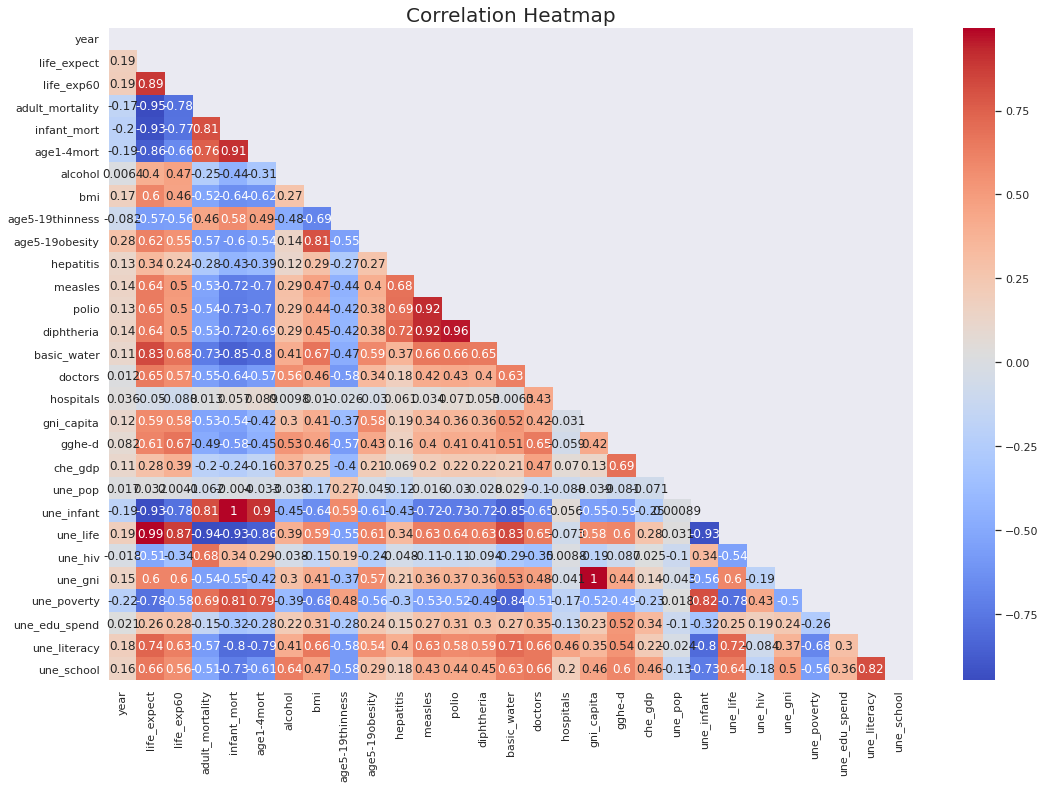

In [103]:
mask = np.triu(np.ones_like(data_df.corr()))
plt.subplots(figsize=(18,12))
dataplot = sns.heatmap(data_df.corr(), cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap",size=20)
plt.show()

**Một số nhận xét về mối tương quan giữa các thuộc tính thông qua heatmap trên:**
- Có thể dễ dàng nhận thấy được các thuộc tính có tương quan đồng biến cao, liên hệ mật thiết với nhau như: Giữa une_life và life_expect, une_infant và infant_mort, une_gni vaf gni_capita, basic_water và life_expect, ...
- Các thuộc tính có tương quan nghịch biến cao, liên hệ mật thiết với nhau như: Giữa adult_mortality, infant mort với life_expect
- Có thể thấy tính tương quan của chỉ số life_expect với adult_mortality, infant mort, measles, polio, doctors là khá cao. Vì vậy, để tăng chỉ số tuổi thọ ta cần xem xét các thuộc tính này.
- Và giữa các thuộc tính có tính tương quan cao với chỉ số life_expect với adult_mortality, infant mort, measles, polio, doctor. Vì vậy có thể xem xét giảm đi các thuộc tính khác.

## Xóa 1 số thuộc tính có tính liên quan cao

In [104]:
data_df.columns

Index(['country', 'country_code', 'region', 'year', 'life_expect',
       'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol',
       'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis', 'measles',
       'polio', 'diphtheria', 'basic_water', 'doctors', 'hospitals',
       'gni_capita', 'gghe-d', 'che_gdp', 'une_pop', 'une_infant', 'une_life',
       'une_hiv', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy',
       'une_school'],
      dtype='object')

In [105]:
name_columns = ['country_code']
#data_df = data_df.drop(columns=name_columns, axis=1)

# Đưa ra các câu hỏi cần trả lời - Câu hỏi 1
**Câu hỏi 1: Phân tích tuổi thọ của từng khu vực, từng quốc gia thay đổi như thế nào? Tại sao lại có sự không đồng đều giữa các khu vực như vậy?**
- Phân tích dựa trên tuổi thọ trung bình tất cả các năm của từng khu vực, từng quốc gia?
 + Các khu vực, quốc gia có tuổi thọ trung bình cao nhất, thấp nhất và sự phân bố các quốc gia đó theo châu lục.
- Tốc độ tăng trưởng của mỗi khu vực có sự biến động tăng, giảm ra sao?  
  + Khu vực có sự tốc độ tăng trưởng cao nhất, khu vực duy trì được sự ổn định.
- Tốc độ tăng  trưởng trong 3 năm gần đây nhất của từng khu vực và quốc gia?  Từ đó dự đoán tuổi thọ trong năm tiếp theo?
 + Việc phân tích trong khoảng thời gian mới nhất, để thấy rõ mức độ tăng trưởng tuổi thọ dương hay âm cụ thể và chính xác nhất.
 + Việc xem tốc độ tăng trưởng cụ thể để đưa ra dự báo cho các quốc gia trong năm tiếp theo.
 + Xem đất nước chúng ta "Việt nam" đang nằm ở đâu và mức độ tăng trưởng đang đi theo chiều hướng nào?

**Ý nghĩa khi đưa ra câu hỏi:** Trả lời được câu hỏi này sẽ giúp cho các quốc gia biết được tình hình tuổi thọ của đất nước mình, từ đó chính phủ các nước đưa ra các giải pháp để duy trì và tăng tuổi thọ của đất nước trong năm tiếp theo.

## Sự phân bố tuổi thọ của các quốc gia trên toàn thế giới

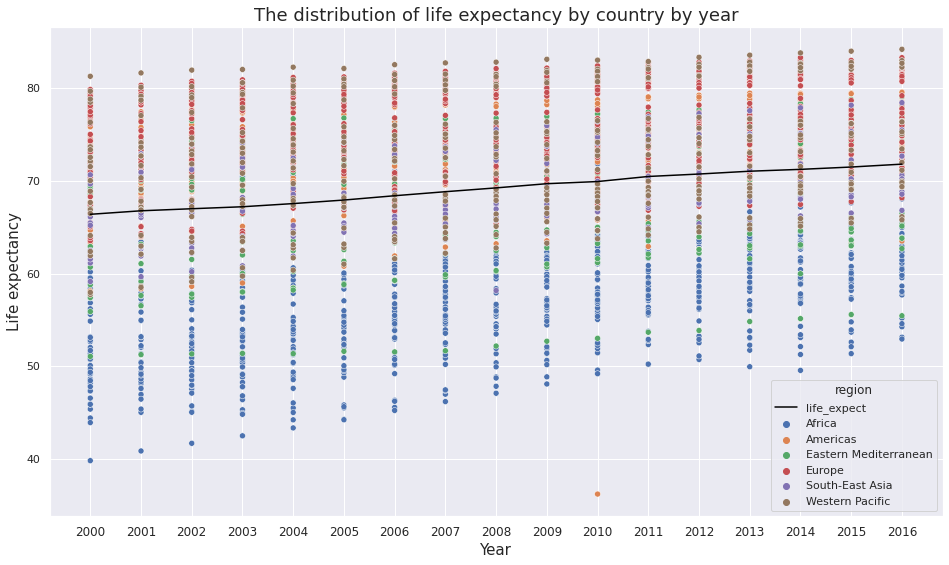

In [106]:
plt.figure(figsize=(16,9))
mean_life_expectancy_sr = data_df.groupby('year')['life_expect'].mean()
mean_life_expectancy_sr.plot.line(color='black')
sns.scatterplot(x=data_df['year'],y=data_df['life_expect'],hue=data_df['region'])
plt.xticks(range(data_df['year'].min(), data_df['year'].max()+1),size=12)
plt.xlabel('Year',size = 15)
plt.ylabel('Life expectancy',size = 15)
plt.title('The distribution of life expectancy by country by year',size=18)
plt.show()

**Nhận xét:** 
- Hầu hết các quốc gia ở Châu Âu, 1 số quốc gia ở phía Tây Thái Bình Dương và châu Mỹ có tuổi thọ trung bình cao hơn so với các khu vực còn lại trên thế giới.
- Khu vực châu Phi có tuổi thọ trung bình thấp nhất so với các châu lục khác và dưới mức trung bình tuổi thọ của thế giới.

### kiểm tra trường hợp nghi ngờ outlier ở khu vực châu mỹ vào năm 2010

In [107]:
america_2010_df = data_df[(data_df['region'] == 'Americas') & (data_df['year'] == 2010)]
index_min = america_2010_df['life_expect'].idxmin()
america_2010_df.loc[[index_min]]

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
1166,Haiti,HTI,Americas,2010,36.22736,10.728,682.5308,0.077865,0.0211,2.31526,24.6,4.1,7.5,NaN,64.0,66.0,67.0,62.20079,NaN,NaN,1490.0,1.45539,8.1456,9949.322,85.6,60.511,2.1,1480.0,NaN,NaN,NaN,NaN


In [108]:
haiti_df = data_df[data_df['country'] == 'Haiti'][['year','life_expect']]
haiti_df['life_expect'].describe()

count    17.000000
mean     59.955016
std       6.460289
min      36.227360
25%      58.615410
50%      62.605930
75%      63.077250
max      63.526110
Name: life_expect, dtype: float64

**Nhận xét:** 
- Đất nước bị nghi ngờ outlier đó chính là haiti. Bởi vì, vào năm 2010, đất nước Haiti xảy ra động đất sóng thần cướp đi sinh mạng của hàng ngàn người. Chính vì thế, tuổi thọ trung bình giảm trong năm đó là hoàn toàn chính xác. 
- Để tránh việc phân tích dữ liệu được chính xác, ta sẽ loại bỏ dữ liệu năm 2010 ở Haiti.

In [109]:
data_df = data_df[~((data_df['country'] == 'Haiti') & (data_df['year'] == 2010))].reset_index(drop=True)

## Mức độ biến động tuổi thọ trung bình của toàn thế giới là như thế nào?

In [110]:
mean_life_expectancy_sr = data_df.groupby('year')['life_expect'].mean()
mean_life_expectancy_sr

year
2000    66.381261
2001    66.759911
2002    66.981275
2003    67.194990
2004    67.536497
2005    67.918202
2006    68.382742
2007    68.817387
2008    69.228267
2009    69.679568
2010    70.097304
2011    70.457992
2012    70.722041
2013    71.026033
2014    71.225480
2015    71.476842
2016    71.787813
Name: life_expect, dtype: float64

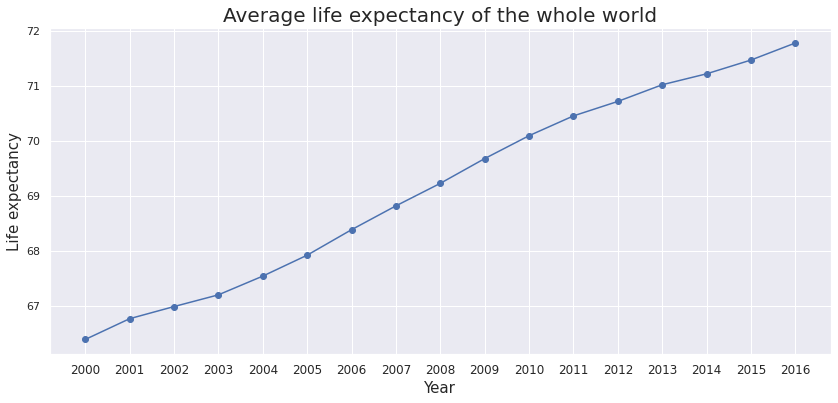

In [111]:
mean_life_expectancy_sr.plot.line(marker='o',figsize=(14,6))
plt.xticks(range(mean_life_expectancy_sr.index.min(),mean_life_expectancy_sr.index.max()+1),size=12)
plt.xlabel('Year',size=15)
plt.ylabel('Life expectancy',size=15)
plt.title('Average life expectancy of the whole world',size=20)
plt.show()

**Nhận xét:** 
- Tuổi thọ trung bình của toàn thế giới tăng qua từng năm đều có sự gia tăng.
- Từ mức tuổi thọ khá thấp 66.3 vào năm 2000. Đã tăng khoảng 5 tuổi và 
đạt giá trị cao nhất vào năm 2016 với tuổi thọ trung bình là 71.8 tuổi. Điều đó cho thấy các quốc gia đã chú trọng đến chăm sóc sức khỏe và đặc biệt có nhiều công nghệ hiện đại hỗ trợ việc gia tăng đó.

## Với mỗi châu lục, Tuổi thọ trung bình là như thế nào?

In [112]:
life_expect_region_df = data_df.groupby('region').agg({'life_expect':'mean'}).rename(columns={'life_expect':'mean_life_expect'})
life_expect_region_df = life_expect_region_df.sort_values(by='mean_life_expect',ascending=True)
life_expect_region_df

,mean_life_expect
region,
Africa,57.679362
South-East Asia,68.667484
Eastern Mediterranean,69.741827
Western Pacific,72.233377
Americas,73.271295
Europe,75.805259


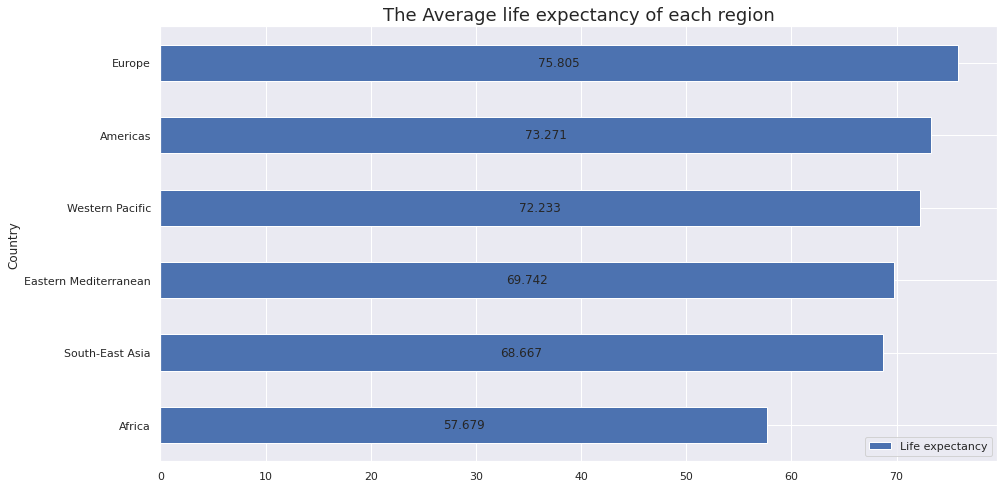

In [113]:
ax = life_expect_region_df.reset_index().plot(kind='barh',x='region',y='mean_life_expect',figsize=(15,8),label='Life expectancy')
plt.ylabel('Country',size=12)
plt.title('The Average life expectancy of each region',size=18)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds  
    ax.annotate(format(round(float(width),3), ','), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')
plt.show()

**Nhận xét:**
- Tuổi thọ trung bình ở khu vực Châu Âu lớn nhất. Tiếp theo, đến khu vực châu Mỹ và châu Á.
- Tuổi thọ trung bình ở khu vực châu Phi có sự chênh lệch lớn so với các châu lục khác trên thế giới.


## Với mỗi quốc gia, tuổi thọ trung bình là như thế nào?

In [114]:
life_expectancy_country = data_df.groupby('country').agg({'life_expect':'mean'})
mean_expectancy_df = life_expectancy_country.rename(columns={'life_expect':'Mean life_expect'})
mean_expectancy_df.sort_values(by=['Mean life_expect'], ascending=False, inplace = True)

In [115]:
country_status = data_df[['country','region']]
country_status = country_status[~country_status.duplicated()]
country_expectancy_df = mean_expectancy_df.merge(country_status, left_on='country', right_on='country')
country_expectancy_df

,country,Mean life_expect,region
0,Japan,82.753574,Western Pacific
1,Switzerland,81.848187,Europe
2,Australia,81.543989,Western Pacific
3,Iceland,81.507846,Europe
4,Italy,81.490516,Europe
...,...,...,...
178,Chad,50.831692,Africa
179,Eswatini,50.260278,Africa
180,Lesotho,49.927415,Africa
181,Central African Republic,48.215201,Africa


### 10 quốc gia có tuổi thọ trung bình cao nhất thế giới

In [116]:
top_10_expectancy = country_expectancy_df[:10]
top_10_expectancy

,country,Mean life_expect,region
0,Japan,82.753574,Western Pacific
1,Switzerland,81.848187,Europe
2,Australia,81.543989,Western Pacific
3,Iceland,81.507846,Europe
4,Italy,81.490516,Europe
5,Spain,81.391195,Europe
6,Sweden,81.161942,Europe
7,Singapore,81.070605,Western Pacific
8,Canada,81.067231,Americas
9,France,81.029753,Europe


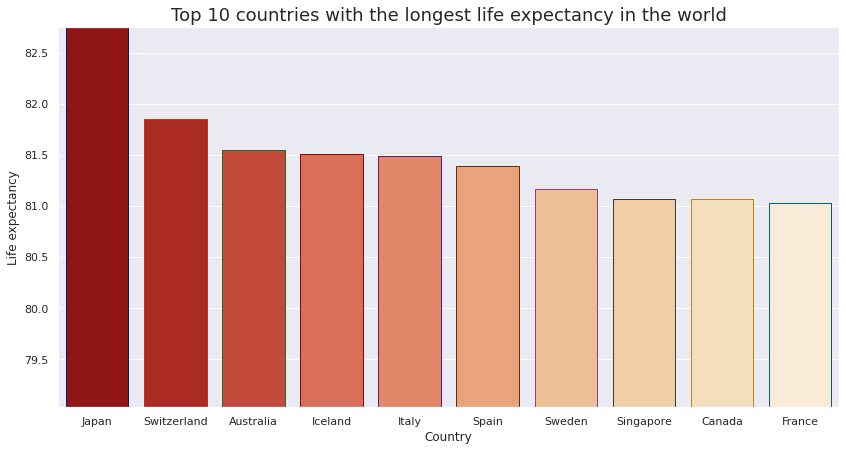

In [117]:
plt.subplots(figsize=(14,7))
sns.barplot(x=top_10_expectancy['country'], y=top_10_expectancy['Mean life_expect'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',25))
plt.ylabel('Life expectancy',size=12)
plt.xlabel('Country',size=12)
plt.title('Top 10 countries with the longest life expectancy in the world', size=18)
plt.ylim(min(top_10_expectancy['Mean life_expect'])-2, max(top_10_expectancy['Mean life_expect']))
plt.show()

#### 10 quốc gia có tuổi thọ lớn nhất thế giới thì tập trung ở khu vực nào?

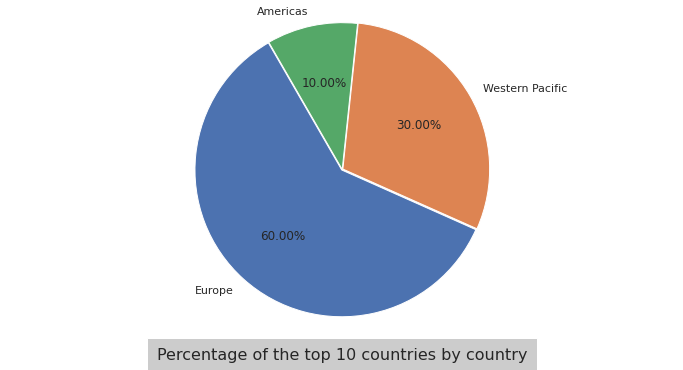

In [118]:
region_df = top_10_expectancy['region'].value_counts(normalize = True) *100
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.pie(region_df.values, labels = region_df.index,autopct='%1.2f%%',explode = (0.005,0.005,0), startangle = 120)
ax.axis('equal')
ax.set_title('Percentage of the top 10 countries by country', bbox={'facecolor':'0.8', 'pad':10},y=-0.1,size=16)
plt.show()

**Nhận xét:**
- Nhật Bản là quốc gia có tuổi thọ trung bình lớn nhất thế giới với độ tuổi trung bình 82.75. Đứng sau Nhật bản bao gồm Thụy Sĩ, Áo, Iceland, Ý, Tây Ban Nha, Thụy Điển, Sigapore, Canada và xếp cuối trong top 10 quốc gia là Pháp. 
- Nhận thấy trong top 10 các quốc gia tuổi thọ trung bình cao nhất thế giới thì hầu hết tập trung ở các nước Châu Âu và 1 số nước ở Châu Á.
- Tuy nhiên, số liệu ở đây là tính trong khoảng thời gian từ năm 2000->2016 nên sự so sánh ở đây còn khá khập khiễng, chưa phản ánh đúng sự chú ý đến tuổi thọ của chính phủ các quốc gia trong những năm gần đây.

### 10 quốc gia có tuổi thọ trung bình thấp nhất thế giới

In [119]:
tail_10_expectancy = country_expectancy_df[-10:]
tail_10_expectancy

,country,Mean life_expect,region
173,Mozambique,53.536801,Africa
174,Somalia,52.803960,Eastern Mediterranean
175,Côte d'Ivoire,51.484058,Africa
176,Zimbabwe,51.274442,Africa
177,Nigeria,51.192344,Africa
178,Chad,50.831692,Africa
179,Eswatini,50.260278,Africa
180,Lesotho,49.927415,Africa
181,Central African Republic,48.215201,Africa
182,Sierra Leone,46.791260,Africa


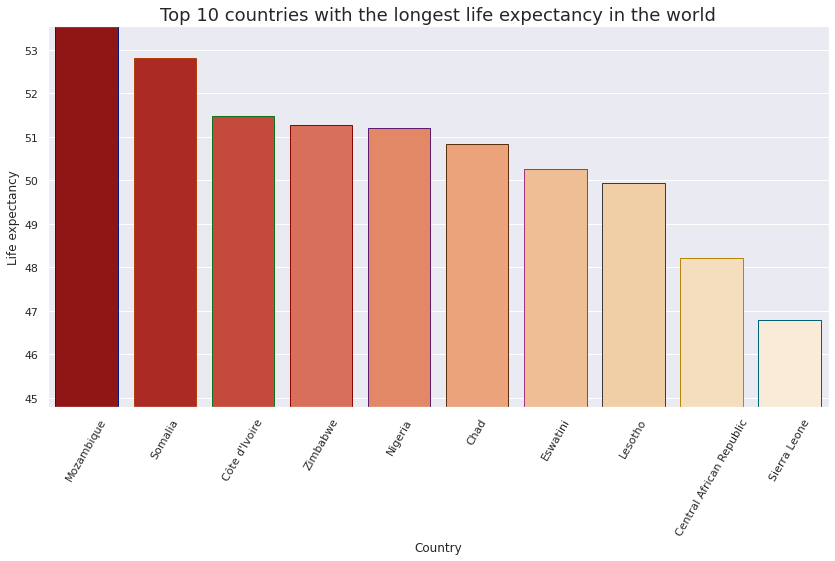

In [120]:
plt.subplots(figsize=(14,7))
sns.barplot(x=tail_10_expectancy['country'], y=tail_10_expectancy['Mean life_expect'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',25))
plt.xticks(rotation=60)
plt.ylabel('Life expectancy',size=12)
plt.xlabel('Country',size=12)
plt.title('Top 10 countries with the longest life expectancy in the world', size=18)
plt.ylim(min(tail_10_expectancy['Mean life_expect'])-2, max(tail_10_expectancy['Mean life_expect']))
plt.show()

#### 10 quốc gia có tuổi thọ thấp nhất thế giới thì tập trung ở khu vực nào?

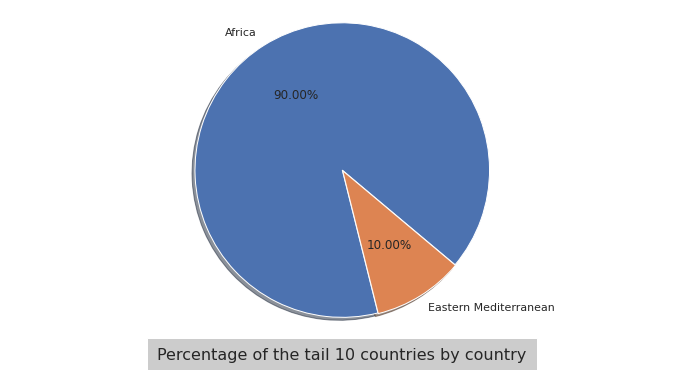

In [121]:
region_df = tail_10_expectancy['region'].value_counts(normalize = True) *100
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.pie(region_df.values, labels = region_df.index,autopct='%1.2f%%',explode = (0.005,0.),shadow=True, startangle = 320)
ax.axis('equal')
ax.set_title('Percentage of the tail 10 countries by country', bbox={'facecolor':'0.8', 'pad':10},y=-0.1,size=16)
plt.show()

**Nhận xét:**
- Sierra Leone là quốc gia có tuổi thọ trung bình thấp nhất thế giới với độ tuổi trung bình 46.8. Đứng trên Sierra leone bao gồm cộng hòa Trung Phi, Lesotho, Nigeria, ... và xếp đầu trong top 10 quốc gia thấp nhất là Mozambique. 
- Nhận thấy trong top 10 các quốc gia tuổi thọ trung bình thấp nhất thế giới thì hầu hết tập trung ở các quốc gia Châu Phi. 
- Một trong những vấn đề sức khỏe lớn nhất mà châu Phi phải đối mặt là đại dịch HIV / AIDS. HIV / AIDS đã cướp đi sinh mạng của nhiều người ở châu Phi, đó là lý do chính khiến tuổi thọ trung bình thấp đến vậy. Việc chữa trị những căn bệnh này rất khó khăn vào thời kỳ cao điểm của dịch bệnh, rất nhiều người châu Phi đã không may qua đời.

Nguồn: https://borgenproject.org/life-expectancy-in-africa-improves/

## Tốc độ tăng trưởng của mỗi khu vực là như thế nào?

In [122]:
min_year = data_df['year'].min()
max_year = data_df['year'].max()

In [123]:
df1 = data_df[data_df['year'].isin([min_year,max_year])]
df1.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
16,Angola,AGO,Africa,2016,62.63262,17.34829,237.9694,0.057900,0.007520,5.38006,23.3,8.3,2.4,55.0,45.0,53.0,59.0,55.08428,NaN,NaN,NaN,1.19754,2.71315,28842.489,55.5,59.925,1.9,6410.0,NaN,NaN,NaN,NaN
17,Burundi,BDI,Africa,2000,51.43743,15.71862,369.9736,0.103510,0.017145,7.17131,20.6,9.1,0.3,NaN,72.0,71.0,80.0,50.66312,NaN,NaN,580.0,1.46507,6.17697,6378.871,95.7,49.091,3.3,580.0,NaN,2.64548,59.30362,NaN
33,Burundi,BDI,Africa,2016,60.09811,16.59126,290.1858,0.052420,0.006450,3.88586,21.7,7.3,1.9,94.0,93.0,94.0,94.0,60.20415,NaN,NaN,NaN,1.80345,7.49216,10487.995,44.0,60.528,1.2,740.0,NaN,4.69272,NaN,NaN
34,Benin,BEN,Africa,2000,55.60088,16.44590,281.8114,0.096595,0.015685,1.43565,22.1,9.9,0.8,NaN,70.0,78.0,78.0,61.45970,NaN,NaN,1200.0,1.10300,4.23001,6865.951,86.4,55.391,1.3,1320.0,NaN,2.88869,NaN,NaN


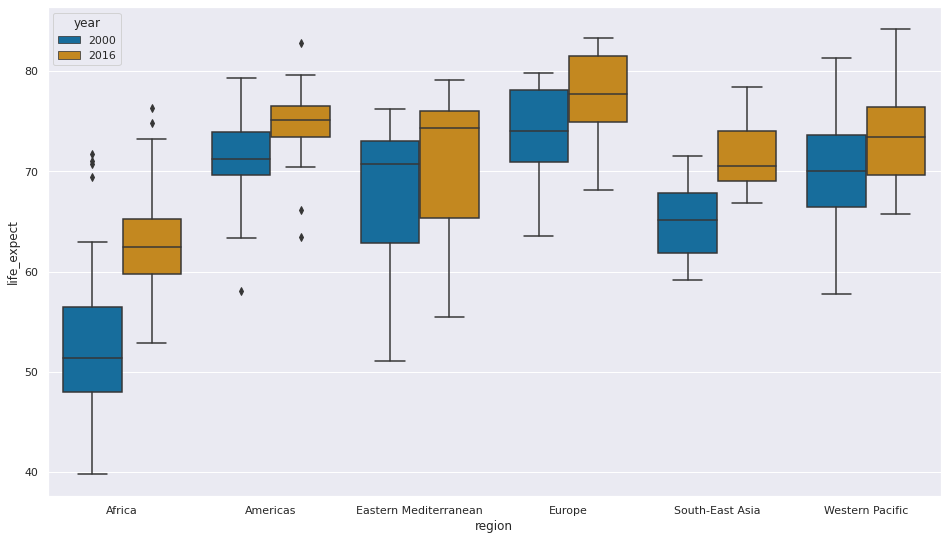

In [124]:
plt.subplots(figsize=(16,9))
sns.boxplot(y='life_expect', x='region', 
                 data=df1, 
                 palette="colorblind",
                 hue='year')
plt.show()

**Nhận xét:**
- Tăng trưởng tuổi thọ lớn nhất trong 15 năm được quan sát được quan sát thấy ở Khu vực Đông Nam Á.
- Châu Phi là khu vực có tốc độ tăng trưởng khá nhanh nhưng tuổi thọ vẫn còn có sự chênh lệch khá lớn với  các khu vực còn lại. Trong khi Cape Verde là ngoại lệ với tuổi thọ cao.
- Các quốc gia trong Khu vực châu Mỹ là đồng nhất về tuổi thọ, mặc dù Bolivia và Haiti có giá trị thấp hơn so với các quốc gia khác trong khu vực.

## Tốc độ tăng trưởng tuổi thọ của các quốc gia trên thế giới trong 3 gần đây nhất

- Để có cái nhìn chính xác hơn, ta chỉ lấy số liệu trong 3 năm gần đây nhất. Phần này, nhóm sẽ có cái nhìn tổng quát hơn về số liệu như đưa ra tốc độ tăng trưởng trung bình trong 3 năm và từ đó có thể dự đoán tuổi thọ trung bình các quốc gia đó trong các năm tiếp theo.

In [125]:
def growth_rate_by_country(country, expectancy_df, name_attr, number_year):
    sort_year_expectancy_df = expectancy_df[expectancy_df['country'] == country].sort_values(by = 'year')[-number_year:]
    expectancy_values = sort_year_expectancy_df[name_attr].values
    mean_growth_rate_year = (np.diff(expectancy_values) / expectancy_values[:-1])*100
    return country, mean_growth_rate_year.mean()

In [126]:
#country_rate_growth_df là 1 dataframe chứa 2 cột country và Rate growth life expectancy (tốc độ tăng trưởng tuổi thọ) 
number_year = 3
country_rate_growth = [growth_rate_by_country(country, data_df, 'life_expect', number_year) for country in data_df['country'].unique()]
country_rate_growth = dict(country_rate_growth)
country_rate_growth_df = pd.Series(country_rate_growth).to_frame().reset_index()
country_rate_growth_df.columns=['country','Rate growth life expectancy']

In [127]:
# Kết hợp với dữ liệu của năm 2016 để thấy được rõ hơn tuổi thọ hiện tại. 
max_year = data_df[data_df['year'] == data_df['year'].max()]
country_rate_growth_df = country_rate_growth_df.merge(max_year[['country','year','life_expect','region']],left_on='country',right_on='country')
country_rate_growth_df = country_rate_growth_df.sort_values(by='life_expect',ascending=False).set_index('country')
country_rate_growth_df.head()

,Rate growth life expectancy,year,life_expect,region
country,,,,
Japan,0.232679,2016,84.16616,Western Pacific
Switzerland,-0.008585,2016,83.26371,Europe
Spain,0.040871,2016,83.07912,Europe
Singapore,0.226378,2016,82.94685,Western Pacific
France,0.228772,2016,82.94602,Europe


### Top 10 quốc gia có tuổi thọ lớn nhất thế giới, tốc độ tăng trưởng như thế nào?

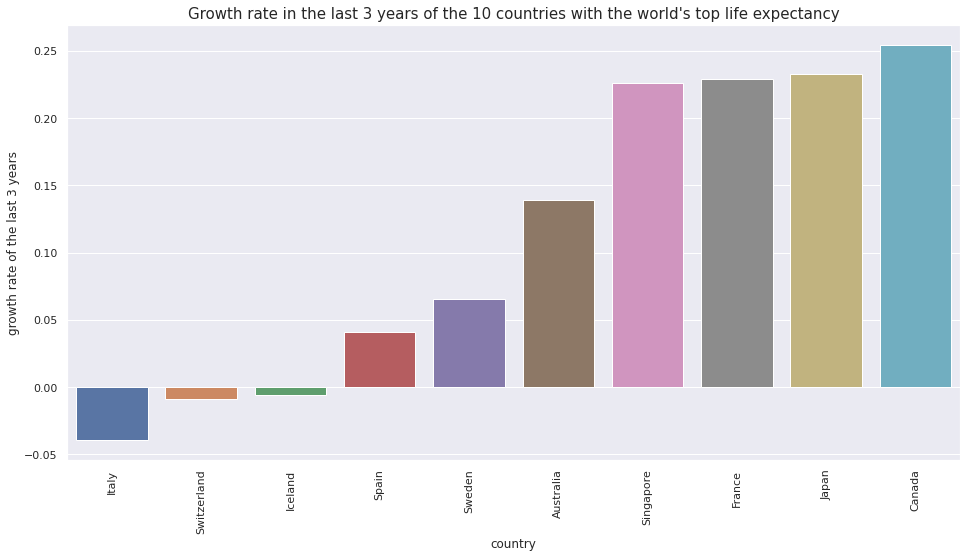

In [128]:
name_country = top_10_expectancy['country'].tolist()
top_10_life_expect_rate = country_rate_growth_df.loc[name_country]['Rate growth life expectancy'].sort_values(ascending = True)
plt.figure(figsize=(16,8))
sns.barplot(x=top_10_life_expect_rate.index, y=top_10_life_expect_rate.values)
plt.xticks(rotation=90)
plt.ylabel('growth rate of the last 3 years',size=12)
plt.title("Growth rate in the last 3 years of the 10 countries with the world's top life expectancy",size=15)
plt.show()

**Nhận xét:** Trong 10 quốc gia có tuổi thọ trung bình lớn nhất thế giới, 3 quốc gia có tốc độ trung bình đang có xu hướng giảm đó là Italy, Thụy Sĩ và Iceland. Còn lại các quốc gia khác đang có xu hướng tăng, trung bình khoảng 0.2% mỗi năm.

### Top 10 quốc gia có tuổi thọ thấp nhất thế giới, tốc độ tăng trưởng như thế nào?

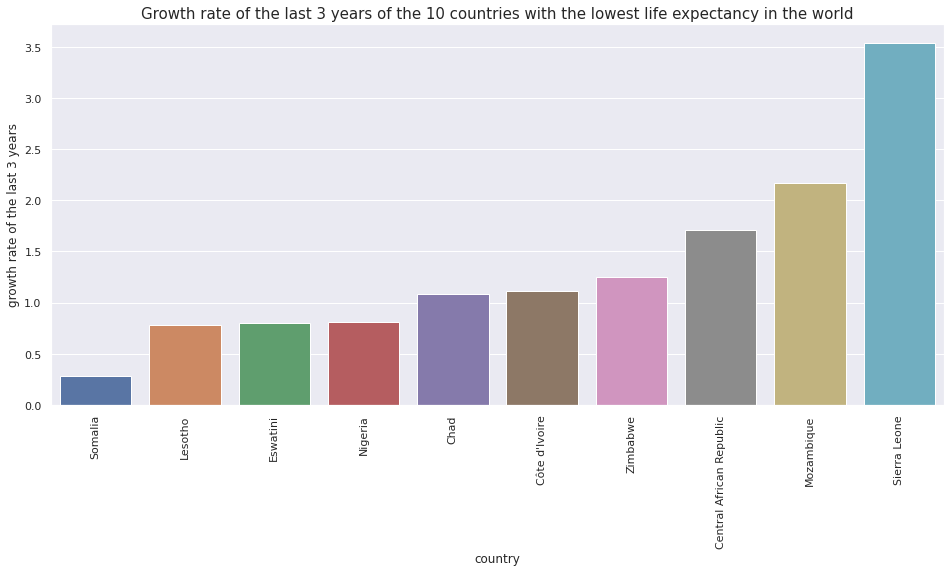

In [173]:
name_country = tail_10_expectancy['country'].tolist()
top_10_life_expect_rate = country_rate_growth_df.loc[name_country]['Rate growth life expectancy'].sort_values(ascending = True)
plt.figure(figsize=(16,7))
sns.barplot(x=top_10_life_expect_rate.index, y=top_10_life_expect_rate.values)
plt.xticks(rotation=90)
plt.ylabel('growth rate of the last 3 years',size=12)
plt.title("Growth rate of the last 3 years of the 10 countries with the lowest life expectancy in the world",size=15)
plt.show()

**Nhận xét:** Trong 10 quốc gia có tuổi thọ trung bình thấp nhất thế giới, tất cả các quốc gia khác đang có xu hướng tăng, trung bình khoảng 1.2% mỗi năm. Ngoài ra, có 1 số quốc gia có xu hướng tăng rất nhanh như Mozambique, Siera Leone với tốc độ hơn 2% mỗi năm.

### Top 10 quốc gia có tuổi thọ trung bình lớn nhất thế giới năm 2016

In [130]:
top_10_country_year_2016 = set(country_rate_growth_df.iloc[:10].index)
new_country = top_10_country_year_2016 - set(top_10_expectancy['country'])
new_country

{'Norway', 'Republic of Korea'}

In [131]:
country_rate_growth_df.loc[new_country]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Republic of Korea,0.28926,2016,82.66409,Western Pacific
Norway,0.15189,2016,82.47630,Europe


**Nhận xét:**
- Trong 10 quốc gia có tuổi thọ trung bình lớn nhất thế giới năm 2016 so với 10 quốc gia  tuổi thọ trung bình lớn nhất thế giới giai đoạn 2000 - 2016 thì có 2 quốc gia mới là norway và hàn quốc.

### Với các quốc gia ở Châu Âu

In [132]:
europe_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Europe']
europe_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,50.000000,50.000000
mean,77.819102,0.223157
std,4.179629,0.238465
min,68.164240,-0.144451
25%,74.879868,0.035326
50%,77.757440,0.202619
75%,81.518637,0.315055
max,83.263710,1.218504


**Nhận xét:** 
- Hầu hết các các quốc gia ở Châu Âu có tuổi thọ trung bình tương đối cao (khoảng 78 tuổi) và tốc độ tăng tuổi thọ mỗi năm ở mức độ vừa phải (khoảng 0.2%). 
- Bởi vì tuổi thọ con người có mức hạn nhất định, nên khi đến độ tuổi trên 80, hiện tượng lão hóa ở người lớn bắt đầu có dấu hiệu thì tốc độ tăng tuổi thọ sẽ không còn được cao so với các độ tuổi thấp hơn.

In [133]:
europe_country[europe_country['Rate growth life expectancy'] > 0.5]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Belarus,0.606144,2016,74.15955,Europe
Ukraine,1.218504,2016,72.49735,Europe
Russian Federation,0.514653,2016,71.86533,Europe
Kyrgyzstan,0.626104,2016,71.40205,Europe
Kazakhstan,0.667497,2016,71.14480,Europe
Turkmenistan,0.529173,2016,68.16424,Europe


**Nhận xét:** 
- Nhận thấy hầu hết các quốc gia có tốc độ tăng tuổi thọ khá cao điển hình như Belarus, Ukraine, Nga, ..(từ liên xô, nam tư chia ra).
- Dù có tốc độ tăng trưởng khá cao nhưng tuổi thọ trung bình vẫn thấp hơn khá nhiều so với tuổi thọ trung bình của khu vực. Nguyên nhân ...

In [134]:
europe_country[europe_country['Rate growth life expectancy'] < 0]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Switzerland,-0.008585,2016,83.26371,Europe
Italy,-0.039163,2016,82.77284,Europe
Iceland,-0.005977,2016,82.39584,Europe
Netherlands,-0.048216,2016,81.63280,Europe
Malta,-0.029308,2016,81.49574,Europe
Belgium,-0.022273,2016,81.16279,Europe
Greece,-0.054121,2016,81.16033,Europe
Germany,-0.003444,2016,81.00278,Europe
Slovenia,-0.010794,2016,80.91451,Europe


**Nhận xét:** Có 1 số nước bị giảm tuổi thọ tương đối lớn như Thụy Si, Bỉ, Đức, Ý (tập trung ở Đông Âu) nhưng đa phần các quốc gia vẫn có tuổi thọ trung bình cao hơn mức trung bình của khu vực. Nguyên nhân trong khoảng thời gian 2013-2016, các nước này bị một số nguồn lây nhiễm Non-Communicable Diseases, nên tỉ lệ tử vong ngày càng nhiều và dẫn đến tuổi thọ trung bình bị giảm xuống nhưng tỉ lệ giảm xuống không đáng kể.

### Với các quốc gia ở Châu Phi

In [135]:
Africa_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Africa']
Africa_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,47.000000,47.000000
mean,62.526440,0.908341
std,5.396261,0.680389
min,52.938010,0.091400
25%,59.813050,0.561000
50%,62.495410,0.777371
75%,65.238830,1.036720
max,76.363650,3.542276


**Nhận xét:** 
- Hầu hết các các quốc gia ở Châu  Phi có tuổi thọ trung bình tương đối thấp (khoảng 65 tuổi) và tốc độ tăng tuổi thọ mỗi năm ở mức độ vừa phải (khoảng 0.8%). 
- Nguyên nhân ...

In [136]:
Africa_country[Africa_country['Rate growth life expectancy'] > 2]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Liberia,3.425052,2016,62.94294,Africa
Mozambique,2.170155,2016,60.09870,Africa
Sierra Leone,3.542276,2016,53.13050,Africa


**Nhận xét:**
- 1 số quốc gia như Liberia, Mozambique, Siera Leone có tốc độ tăng tuổi thọ cao. Tuy vẫn còn thấp so với tuổi thọ trung bình trong khu vực nhưng với tốc độ tăng trưởng này thì 1 vài năm sau có thể bắt kịp tuổi thọ trung bình trong khu vực và xa hơn là ngang bằng với tuổi thọ trung bình trên toàn thế giới.

### Với các quốc gia ở châu Á

In [137]:
western_pacific_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Western Pacific']
western_pacific_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,21.000000,21.000000
mean,74.134015,0.265643
std,6.039573,0.118364
min,65.790890,0.010789
25%,69.595250,0.224204
50%,73.429950,0.238610
75%,76.427420,0.296795
max,84.166160,0.523393


**Nhận xét:** 
- Các các quốc gia ở Châu Á có tuổi thọ trung bình khoảng 73.5 tuổi.
- Hầu hết các nước ở châu Á đều có tốc độ tăng tuổi thọ mỗi năm đều tăng và mức độ tăng ở mức độ vừa phải (khoảng 0.25%).
- 1 số quốc gia châu á ngoại lệ như Nhật Bản, Hàn Quốc đã lọt vào top các quốc gia có tuổi thọ trung bình đứng đầu thế giới.

#### Tìm hiểu đất nước thân yêu của chúng ta "Việt Nam"

In [138]:
western_pacific_country.loc[['Viet Nam'],:]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Viet Nam,0.233217,2016,76.33917,Western Pacific


**Nhận xét:** Đất nước chúng ta có tuổi thọ trung bình cao trong các đất nước ở Châu Á và cao hơn so với tuổi thọ trung bình của toàn thế giới. Ngoài ra, tốc độ tăng trưởng mỗi năm khá tương đồng so với các quốc gia ở Châu Á khác. Điều đó cho thấy chính phủ đã có những chính sách, giải pháp quan tâm đến sức khỏe của người dân.

`Thật tuyệt vời :)`

### Dự báo tuổi thọ trung bình của các nước trong năm tiếp theo

In [139]:
forecast_life_expectancy = country_rate_growth_df.copy()
a = forecast_life_expectancy['Rate growth life expectancy'] * forecast_life_expectancy['life_expect'] / 100
forecast_life_expectancy['Forecaste life expectancy 2017'] = a + forecast_life_expectancy['life_expect']

In [140]:
forecast_life_expectancy.head(10)

,Rate growth life expectancy,year,life_expect,region,Forecaste life expectancy 2017
country,,,,,
Japan,0.232679,2016,84.16616,Western Pacific,84.361997
Switzerland,-0.008585,2016,83.26371,Europe,83.256562
Spain,0.040871,2016,83.07912,Europe,83.113075
Singapore,0.226378,2016,82.94685,Western Pacific,83.134623
France,0.228772,2016,82.94602,Europe,83.135777
Australia,0.139382,2016,82.90018,Western Pacific,83.015728
Canada,0.254652,2016,82.80972,Americas,83.020596
Italy,-0.039163,2016,82.77284,Europe,82.740424
Republic of Korea,0.289260,2016,82.66409,Western Pacific,82.903204


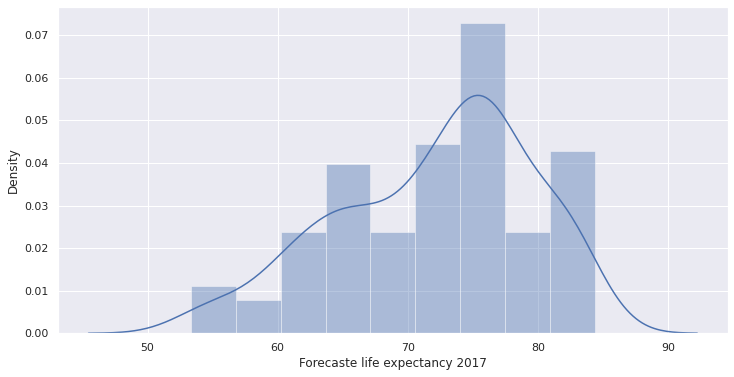

In [141]:
plt.figure(figsize=(12,6))
sns.distplot(forecast_life_expectancy["Forecaste life expectancy 2017"])
plt.show()

# Đưa ra câu hỏi cần trả lời - Câu hỏi 2
**Câu hỏi 2:** Xét thuộc tính GNI per capita và xem có mối quan hệ gì đến tuổi thọ trung bình (life expectancy) hay không?

## GNI per capita toàn thế giới qua các năm biến động như thế nào?

In [142]:
year_gni = data_df.groupby('year')['une_gni'].mean()
year_gni

year
2000    10817.572254
2001    11109.137931
2002    11414.943182
2003    11836.193182
2004    12615.738636
2005    13293.806818
2006    14444.545455
2007    15338.863636
2008    15818.806818
2009    15226.158192
2010    15821.704545
2011    16293.595506
2012    16973.389831
2013    17593.276836
2014    18072.768362
2015    18586.136364
2016    19047.045455
Name: une_gni, dtype: float64

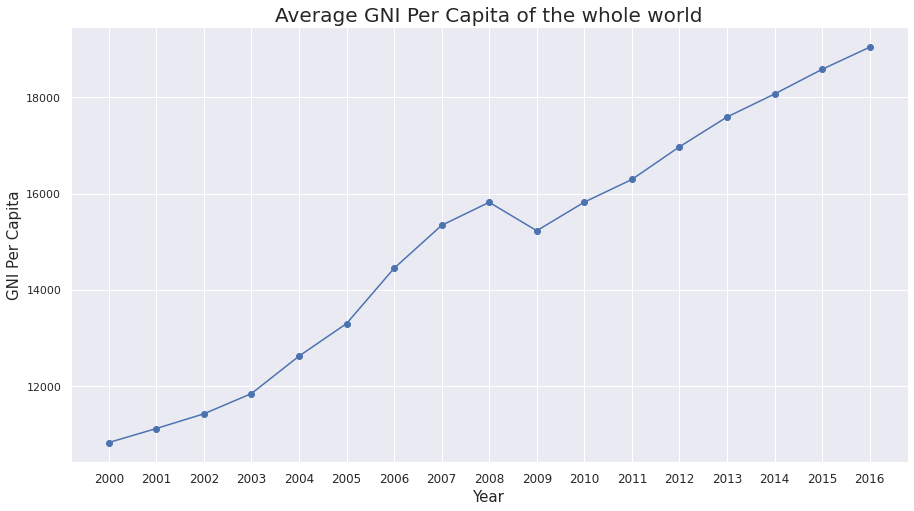

In [143]:
year_gni.plot.line(marker='o',figsize=(15,8))
plt.xticks(range(mean_life_expectancy_sr.index.min(),mean_life_expectancy_sr.index.max()+1),size=12)
plt.xlabel('Year',size=15)
plt.ylabel('GNI Per Capita',size=15)
plt.title('Average GNI Per Capita of the whole world',size=20)
plt.show()

**Nhận xét:** 
- Đa phần trung bình gni trên đầu người trên thế giới qua các năm đều có sự gia tăng qua từng năm. 
- Riêng khoảng từ năm 2008 đến 2009 có sự giảm tương đối lớn.

## Sự thay đổi gni 2008-2009 và xem tuổi thọ trong giai đoạn đó biến động như thế nào?

In [144]:
df1 = data_df[data_df['year'].isin([2008,2009])]
df1 = df1[~df1['une_gni'].isna()]
df1.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
8,Angola,AGO,Africa,2008,56.12413,16.28414,292.1559,0.090765,0.014585,5.19452,22.6,9.6,1.2,45.0,48.0,36.0,49.0,48.77040,NaN,NaN,5720.0,2.13844,3.32290,21695.634,85.8,53.243,1.6,5260.0,30.1,NaN,NaN,NaN
9,Angola,AGO,Africa,2009,57.29004,16.48146,281.0492,0.084800,0.013310,6.11778,22.7,9.4,1.3,47.0,46.0,36.0,50.0,49.57516,1.313,NaN,6200.0,2.60046,3.84261,22514.281,80.7,54.311,1.7,5500.0,NaN,NaN,NaN,NaN
25,Burundi,BDI,Africa,2008,56.15262,16.15658,340.4030,0.070920,0.010495,4.79559,21.2,8.0,0.8,92.0,84.0,89.0,92.0,55.32520,NaN,NaN,690.0,1.55559,9.23542,8126.102,66.3,55.721,1.8,690.0,NaN,5.19290,48.08406,2.43024
26,Burundi,BDI,Africa,2009,56.94687,16.22978,330.1201,0.066960,0.009760,4.49375,21.3,7.9,0.9,94.0,91.0,96.0,94.0,55.92218,NaN,NaN,690.0,2.07939,10.35022,8397.668,62.7,56.488,1.7,690.0,NaN,6.17195,NaN,NaN
42,Benin,BEN,Africa,2008,58.18098,16.77504,276.0660,0.077865,0.011770,1.38337,22.9,8.3,1.5,75.0,66.0,77.0,75.0,64.09259,0.623,NaN,1580.0,0.76933,3.68345,8696.921,73.2,58.654,1.1,1770.0,NaN,3.79566,NaN,NaN


In [145]:
#gni_rate_growth tạo ra 1 dataframe chứa country và tốc độ tăng trưởng gni của năm 2019 so với năm 2018
number_year = 2
gni_rate_growth = [growth_rate_by_country(country,df1,'une_gni', number_year) for country in df1['country'].unique()]
gni_rate_growth = dict(gni_rate_growth)
gni_rate_growth = pd.Series(gni_rate_growth).to_frame().reset_index()
gni_rate_growth.columns=['country','Rate growth gni']

In [146]:
#life_expect_rate_growth tạo ra 1 dataframe chứa country và tốc độ tăng trưởng life_expect của năm 2019 so với năm 2018
life_expect_rate_growth = [growth_rate_by_country(country,df1,'life_expect', number_year) for country in df1['country'].unique()]
life_expect_rate_growth = dict(life_expect_rate_growth)
life_expect_rate_growth = pd.Series(life_expect_rate_growth).to_frame().reset_index()
life_expect_rate_growth.columns=['country','Rate growth life_expect']

In [147]:
#kết hợp 2 dataframe gni_rate_growth và life_expect_rate_growth
gni_life_expect_year = gni_rate_growth.merge(life_expect_rate_growth, on='country')
gni_life_expect_year

,country,Rate growth gni,Rate growth life_expect
0,Angola,4.562738,2.077377
1,Burundi,0.000000,1.414449
2,Benin,0.000000,1.288944
3,Burkina Faso,0.000000,1.406846
4,Botswana,-4.323002,3.205589
...,...,...,...
172,Japan,-4.760571,0.372920
173,Cambodia,-0.884956,1.041917
174,Kiribati,-5.859375,0.757281
175,Republic of Korea,-1.361257,0.480232


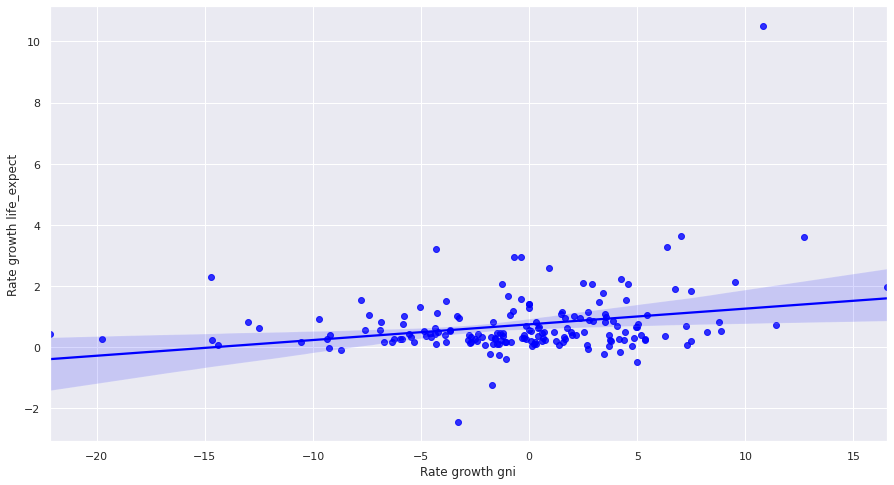

In [148]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=gni_life_expect_year['Rate growth gni'],y=gni_life_expect_year['Rate growth life_expect'], color = 'blue', ax = ax)
plt.show()

**Nhận xét:** 
- Có 1 số điểm tốc độ tăng trưởng âm lớn (<-10) nhưng tuổi thọ trung bình của năm đó vẫn tăng nhẹ điều đó cho thấy gdp chỉ là 1 tác động nhỏ vào life expectancy.

## Biểu diễn mối quan hệ theo khu vực

**Notes:** Bởi vì đang tìm mối quan hệ giữa gni với life expectancy nên những quốc gia không có số liệu về gni sẽ bị loại bỏ. Điều này không ảnh hưởng tới việc biểu diễn mối quan hệ giữa 2 thuộc tính này.

In [149]:
gni_life_expect_df = data_df[~data_df['une_gni'].isna()].reset_index(drop=True)
gni_life_expect_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [150]:
gni_life_expect_df.shape

(2993, 32)

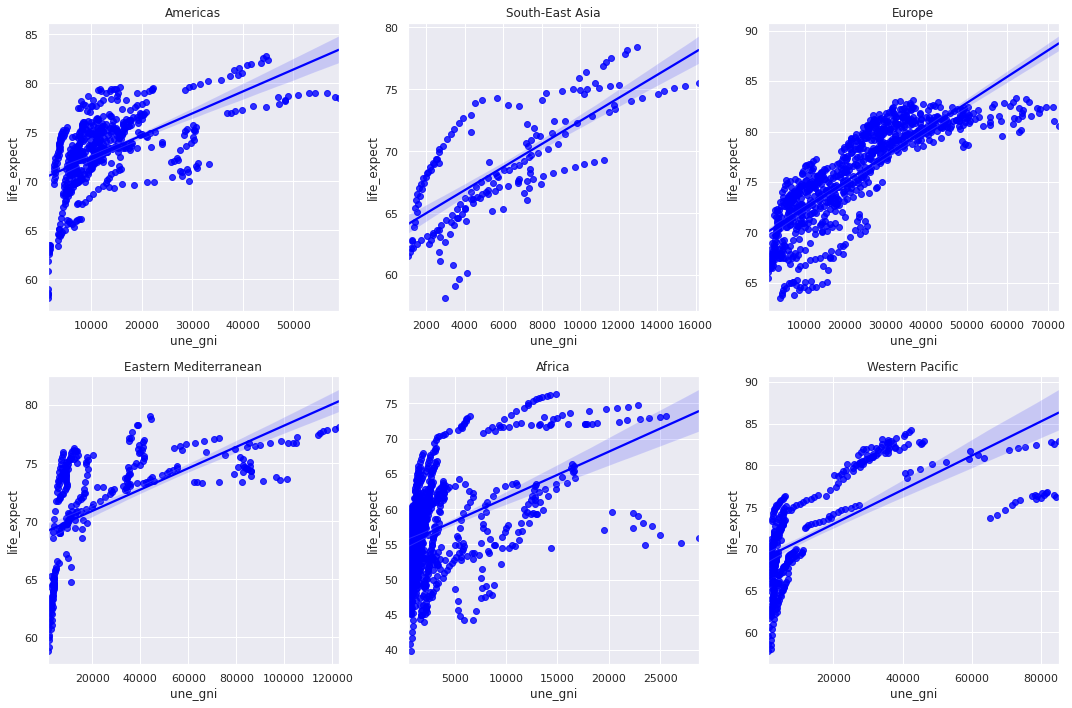

In [151]:
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(gni_life_expect_df["region"]), axs.flat):
    Conts = gni_life_expect_df[gni_life_expect_df['region'] == conts]
    sns.regplot(x = Conts['une_gni'],y = Conts["life_expect"], color = 'blue', ax = ax).set_title(conts)

plt.tight_layout()  
sns.set(color_codes=True)
plt.show()

**Nhận xét:** 
- Tất cả các khu vực đều cho thấy khi gni tăng --> life_expectancy tăng.
- Đường thẳng càng dốc cho biết được tốc độ tăng tuổi thọ càng nhanh và mức độ quan hệ tuyến tuyến càng mạnh.

## Xem  GNI đầu người của các nước như thế nào và có mối liên quan nào với life expectancy ko?

In [152]:
gni_country = gni_life_expect_df.groupby('country').agg({'une_gni':'mean'}).rename(columns={'une_gni':'mean_une_gni'})
gni_country = gni_country.sort_values(by='mean_une_gni', ascending = False)
gni_country['Rank GNI'] = np.arange(1,gni_country.shape[0]+1)
gni_country

,mean_une_gni,Rank GNI
country,,
Qatar,102436.470588,1
Kuwait,82688.235294,2
Brunei Darussalam,76776.470588,3
United Arab Emirates,72211.176471,4
Singapore,62601.764706,5
...,...,...
Mozambique,818.823529,174
Central African Republic,804.705882,175
Niger,762.352941,176


In [153]:
gni_country.loc['Viet Nam']

mean_une_gni    3845.294118
Rank GNI         125.000000
Name: Viet Nam, dtype: float64

**Nhận xét:**  
- UAE, Brunei Darussalam, Kuwait là những người theo sau Qatar trong chỉ số này. Hầu hết các quốc gia có gni đầu người cao đều tập trung ở các nước có dầu mỏ, khoáng sản phong phú,...
- Guinea, Mozambique, Gambia, Niger và Congo là những quốc gia có gni đầu người thấp nhất.
- Sự chêch lệch giữa top 10 quốc gia đứng đầu và 10 quốc gia thấp nhất  là rất lớn - khoảng 75000USD và gấp 100 lần.
- Tối bổ sung

### Top 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới, gni đầu người trung bình hàng năm là bao nhiêu?

In [154]:
name_top10_life_expect = top_10_expectancy['country'].tolist()
top_10_life_expect_gni = gni_country.loc[name_top10_life_expect]
top_10_life_expect_gni

,mean_une_gni,Rank GNI
country,,
Japan,34807.647059,24
Switzerland,51006.470588,8
Australia,36175.882353,23
Iceland,36637.647059,21
Italy,33118.235294,27
Spain,29718.823529,28
Sweden,40019.411765,13
Singapore,62601.764706,5
Canada,37754.117647,18


In [155]:
top_10_life_expect_gni['mean_une_gni'].describe()

count       10.000000
mean     39661.294118
std       9827.131103
min      29718.823529
25%      34781.617647
50%      36406.764706
75%      39453.088235
max      62601.764706
Name: mean_une_gni, dtype: float64

**Nhận xét:**  
- 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới đều có mức gni đầu người cao trung bình khoảng 39500$.
- Tất cả 10 quốc gia đó đều có gni đầu người nằm trong top 30 của thế giới.

## Phân tích số liệu giữa gni với life expectancy

In [156]:
temp_df = data_df.copy()
temp_df['life_expect'] = np.log(temp_df['life_expect'])
temp_df['une_gni'] = np.log(temp_df['une_gni'])
temp_df = temp_df[temp_df['year']==2016]
temp_df = temp_df[~temp_df['une_gni'].isna()]

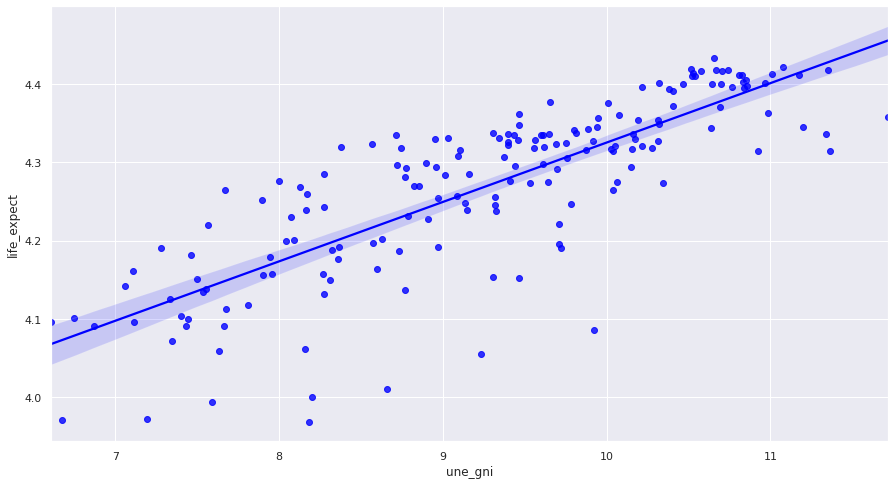

In [157]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=temp_df['une_gni'],y=temp_df['life_expect'], color = 'blue', ax = ax)
plt.show()

#### Phương trình hồi quy biểu diễn mỗi quan hệ giữa gni và life expectancy

In [158]:
Y = temp_df['life_expect']
X = temp_df['une_gni']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const      3.566871
une_gni    0.075850
dtype: float64

In [159]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     333.5
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           2.66e-42
Time:                        12:48:33   Log-Likelihood:                 233.71
No. Observations:                 176   AIC:                            -463.4
Df Residuals:                     174   BIC:                            -457.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5669      0.039     91.886      0.0

**Kết luận:**

- Biến une_gni có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0).
- Mô hình phù hợp khấ tốt với dữ liệu quan sát về mặt thống kê (p-value = 0)
- Biến une_gni có thể giải thích được 65.7% sự thay đổi của biến life_expect.
- Phương trình hồi quy:

          ln(life_expect) 2016 = 3,66 + 0,0759 × ln(une_gni) 2016 ln: logarit tự nhiên

**Theo kết quả của mô hình:**
Phương trình cho chúng ta biết rằng sự gia tăng giá trị logarit tự nhiên của IPC trong một năm làm tăng giá trị logarit tự nhiên của life_expect khoảng 7.5%, có nghĩa là mức tăng GNI trên đầu người gần 8,108 đô la Mỹ cho 56 quốc gia đang phát triển khiến LEB tăng trung bình 4,51 năm trong 56 nước OIC.
- Chỉnh sửa lại

# Xét thuộc tính GGHE-D và xem có mối quan hệ gì đến life expectancy (tuổi thọ trung bình) hay không?

## Chi tiêu y tế toàn thế giới qua các năm biến động như thế nào?

In [160]:
mean_gghe_year = data_df.groupby('year')['gghe-d'].mean()

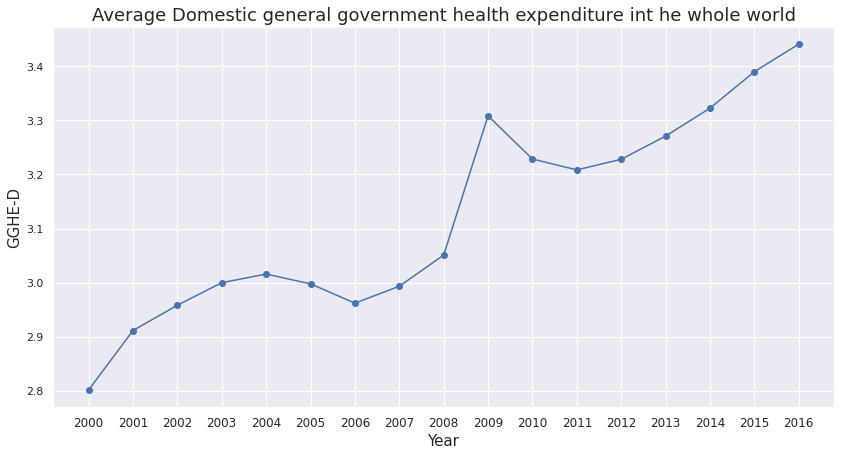

In [161]:
mean_gghe_year.plot.line(marker='o',figsize=(14,7))
plt.xticks(range(mean_gghe_year.index.min(),mean_gghe_year.index.max()+1),size=12)
plt.xlabel('Year',size=15)
plt.ylabel('GGHE-D',size=15)
plt.title('Average Domestic general government health expenditure int he whole world',size=18)
plt.show()

**Nhận xét:**
- Nhìn chung thì qua các năm, tỉ lệ đầu tư của chính phủ cho y tế đang có xu hướng tăng. Từ mức đầu tư 2.8% vào năm 2000 đã tăng lên 3.45% vào năm 2016.
- Có một chút biến động vào giai đoạn 2004 - 2006, tỉ lệ đầu tư của chính phủ cho y tế giảm, thấp nhất là 2.96% vụ năm 2006, sau đó trở về trạng thái ban đầu vào năm 2007 và nhìn chung thì tiếp tục tăng vào các năm tiếp theo.
- Đáng chú ý giai đoạn 2008 - 2009, tỉ lệ đầu tư của chính phú cho y tế tăng một cách đột biến từ 3% lên 3.3%. Trái ngược với sự giảm mạnh của gni đầu người vào giai đoạn đó. Điều đó cho thấy, giai đoạn này thế giới đang gặp phải vấn đề gì đó mà dẫn đến gni đầu người lại giảm mạnh nhưng chi viện của chính phủ cho y tế lại rất nhiều. Theo tôi nghĩ, chắc do dịch bệnh.
- Khi phân tích nguyên nhân giảm gni đầu người năm 2008-2009 thì cho ta thấy tốc độ tăng trưởng tuổi thọ năm 2009 vẫn dương dù gni đầu người giảm. Theo tôi nghĩ, rốc độ tăng trưởng tuổi thọ dương ở đây cũng có phần đầu tư rất lớn của chính phủ dành cho y tế trong năm đó.
- Ta có thể rút ra được rằng, gni đầu người có tác động đến tuổi thọ nhưng còn nhiều yếu tố khác cũng tác động đến tuổi thọ và điển hình ở đây là chi phí dành cho y tế của chính phủ.

## Xem GGHE-D của các nước như thế nào và có mối liên quan nào với life expectancy ko?

In [162]:
gghe_coutnry_df = data_df[~data_df['gghe-d'].isna()]
gghe_country = gghe_coutnry_df.groupby('country').agg({'gghe-d':'mean'}).rename(columns={'gghe-d':'mean_gghe'})
gghe_country = gghe_country.sort_values(by='mean_gghe', ascending = False)
gghe_country['Rank GGHE-D'] = np.arange(1,gghe_country.shape[0]+1)
gghe_country

,mean_gghe,Rank GGHE-D
country,,
Kiribati,9.254519,1
Cuba,8.496848,2
France,8.281034,3
Germany,8.026647,4
Denmark,8.014782,5
...,...,...
Afghanistan,0.487474,175
Guinea,0.401704,176
Myanmar,0.367729,177


**Nhận xét:**
- Cuba, France, Germany, Đan Mạch UAE là những quốc gia theo sau Kiribati trong chỉ số này.
- Afghanistan, Guinea, Myanmar, Congo là những quốc gia có tỉ lệ của chính phủ dành cho y tế thấp nhất.
- Sự chêch lệch giữa top 10 quốc gia đứng đầu và 10 quốc gia thấp nhất  là rất lớn gấp 30 lần.

### Top 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới, tỉ lệ chi tiêu của chính phủ dành cho y tế trên đầu người hàng năm là bao nhiêu?

In [163]:
name_country = top_10_expectancy['country'].tolist()
top_10_life_expectancy_gghe = gghe_country.loc[name_country]
top_10_life_expectancy_gghe

,mean_gghe,Rank GGHE-D
country,,
Japan,7.346999,8
Switzerland,3.299629,65
Australia,5.713366,24
Iceland,7.090096,13
Italy,6.473271,16
Spain,5.919963,22
Sweden,7.615721,6
Singapore,1.290866,147
Canada,7.154623,12


In [164]:
top_10_life_expectancy_gghe['mean_gghe'].describe()

count    10.000000
mean      6.018557
std       2.158358
min       1.290866
25%       5.765015
50%       6.781684
75%       7.298905
max       8.281034
Name: mean_gghe, dtype: float64

**Nhận xét:** 
- Hầu hết 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới ngoại trừ (Thụy sĩ và Singapore) đều có mức đầu tư của chính phủ dành cho y tế cao trên đầu người cao khoảng 6.5%  và nằm trong top 30 của thế giới.

### Phân tích 2 quốc gia Thụy Sĩ và Singapore

In [165]:
thuysi_sigapore_df = data_df[data_df['country'].isin(['Switzerland','Singapore'])].loc[:,['country','life_expect','gghe-d']]
thuysi_df = thuysi_sigapore_df[thuysi_sigapore_df['country']=='Switzerland']
sigapore_df = thuysi_sigapore_df[thuysi_sigapore_df['country']=='Singapore']

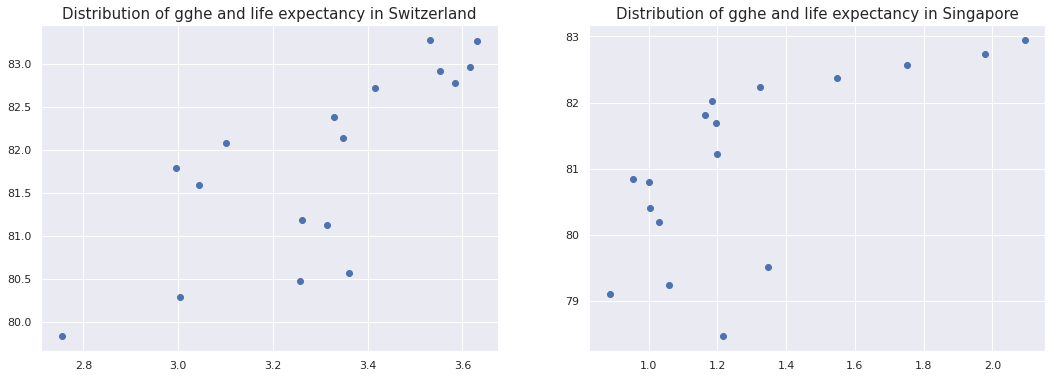

In [166]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 6)
ax[0].scatter(thuysi_df['gghe-d'],thuysi_df['life_expect'])
ax[0].set_title('Distribution of gghe and life expectancy in Switzerland',size=15)
ax[1].scatter(sigapore_df['gghe-d'],sigapore_df['life_expect'])
ax[1].set_title('Distribution of gghe and life expectancy in Singapore',size=15)
plt.show()

**Nhận xét:**
- Dễ dàng nhận thấy rằng 2 thuộc tính này có tương quan, liên hệ mật thiết với nhau. Cụ thể là chúng đồng biến. Nghĩa là tỉ lệ đầu tư của chính phủ dành cho y tế tăng thì tuổi thọ cũng tăng.
- Dù tỉ lệ đầu tư của chính phủ dành cho y tế trên đầu người ở 2 quốc gia Thụy Sĩ và Singapore thấp nhưng hơn so với các quốc gia khác nhưng tuổi thọ vẫn cao. Theo tôi nghĩ, do cơ địa, sức đề kháng tốt nên không còn đầu tư quá nhiều vào y tế.

## Phân tích số liệu giữa gghe-d với life expectancy

In [167]:
temp1_df = data_df.copy()
temp1_df = temp1_df[temp1_df['year']==2016]
temp1_df['life_expect'] = np.log(temp1_df['life_expect'])
temp1_df = temp1_df[~temp1_df['gghe-d'].isna()]

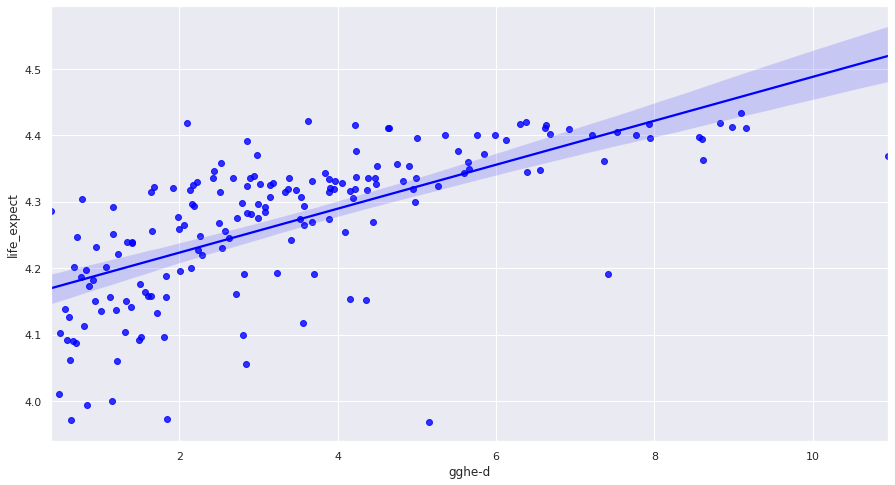

In [168]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=temp1_df['gghe-d'],y=temp1_df['life_expect'], color = 'blue', ax = ax)
plt.show()

### Phương trình hồi quy biểu diễn mối quan hệ giữa gghe-d và life expectancy

In [169]:
Y = temp1_df['life_expect']
X = temp1_df['gghe-d']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const     4.157171
gghe-d    0.033079
dtype: float64

In [170]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           2.28e-24
Time:                        12:48:34   Log-Likelihood:                 192.95
No. Observations:                 176   AIC:                            -381.9
Df Residuals:                     174   BIC:                            -375.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1572      0.011    366.686      0.0

**Kết luận:**

- Biến gghe-d có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0).
- Mô hình phù hợp khá tốt với dữ liệu quan sát về mặt thống kê (p-value = 0)
- Biến gghe-d có thể giải thích được 45% sự thay đổi của biến life_expect.
- Phương trình hồi quy:

          ln(life_expect) 2016 = 4.1572 + 0,0331 × gghe-d 2016 ln: logarit tự nhiên

# Biểu diễn mối quan hệ tuyến tính bội giữa life expectancy và (gghe-d, gni per capita)

In [171]:
temp_df = temp_df[~temp_df['gghe-d'].isna()]
Y = temp_df['life_expect']
X = temp_df[['une_gni','gghe-d']]
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const      3.676810
une_gni    0.058613
gghe-d     0.014645
dtype: float64

In [172]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           6.29e-45
Time:                        12:48:34   Log-Likelihood:                 240.13
No. Observations:                 172   AIC:                            -474.3
Df Residuals:                     169   BIC:                            -464.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6768      0.042     87.633      0.0

**Kết luận:**
- Mô hình hồi quy phù hợp như sau:

  `ln(life_expect) 2016 = 3.6768 + 0,0586 × ln(une-gni) + 0.0146 * gghe-d 2016 ln: logarit tự nhiên`

- Việc giải thích các hệ số hồi quy này như sau:

 + 0,0586 là hệ số hồi quy từng phần của giá trị logarit tự nhiên cho thấy với ảnh hưởng của gghe-d được giữ nguyên không đổi, khi logarit tự nhiên của une-gni tăng 1 đơn vị, logarit tuổi thọ trung bình tăng 0.0586 đơn vị. 
 + Để dễ hiểu hơn về mặt kinh tế, nếu GDP tăng trung bình một vạn BDT (~ 1300 USD), tổng chi tiêu cho y tế sẽ tăng lên đến 0,0432 vạn BDT (~ 56,16 USD). Hệ số âm -7,313 cho chúng ta biết rằng nếu giữ mức ảnh hưởng của GDP không đổi, trung bình, tổng chi tiêu cho y tế giảm khoảng 7,313 lakh BDT (9506 USD) nếu tuổi thọ tăng thêm 1 năm. Giá trị chặn là 183,34, có thể hiểu rằng nếu giá trị GDP và LE được cố định bằng 0, thì tổng chi tiêu trung bình cho y tế sẽ ở mức thấp. Giá trị R² của 0,9972 có nghĩa là khoảng 99. 72% sự thay đổi trong tổng chi tiêu cho y tế có thể được giải thích bằng GDP và LE. Do đó, kết quả cho thấy GDP có ảnh hưởng đáng kể đến THE (p <0,05). Ngoài ra, trong trường hợp tuổi thọ, nó cho thấy mối quan hệ nghịch chiều, nếu LE tăng 1 đơn vị, tổng chi tiêu cho y tế sẽ giảm 7,31 lakh BDT (~ 9506 USD). Nhưng về mặt thống kê, không có mối quan hệ có ý nghĩa giữa tuổi thọ và tổng chi tiêu cho y tế (p> 0,05).